In [1]:
import subprocess
import os,sys
proj_root = os.path.split(os.getcwd())[0]
if proj_root not in sys.path:
    sys.path.append(proj_root)
import convert

timer = convert.probe()

print("Done at ", (timer.end - timer.start)/1000, "s")
# subprocess.check_output(['python', '-mstruct', ' ../convert/to_sas.py'])

[ExtVnfCpd1, Vdu1, VduCpd1, VnfVl, VduCpd2, Vdu2, ExtVnfCpd2, ExtVnfCpd10, ExtVnfCpd11, ExtVnfCpd12, ExtVnfCpd13, ExtVnfCpd14, ExtVnfCpd15, ExtVnfCpd16, ExtVnfCpd17, ExtVnfCpd18, ExtVnfCpd19]
{'state': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'variables': {'ExtVnfCpd1_status': [Atom value (ExtVnfCpd1, Created), Atom value (ExtVnfCpd1, Deleted), Atom value (ExtVnfCpd1, Initial)], 'Vdu1_status': [Atom value (Vdu1, Created), Atom value (Vdu1, Deleted), Atom value (Vdu1, Initial), Atom value (Vdu1, Started)], 'VduCpd1_status': [Atom value (VduCpd1, Created), Atom value (VduCpd1, Deleted), Atom value (VduCpd1, Initial)], 'VnfVl_status': [Atom value (VnfVl, Created), Atom value (VnfVl, Deleted), Atom value (VnfVl, Initial)], 'VduCpd2_status': [Atom value (VduCpd2, Created), Atom value (VduCpd2, Deleted), Atom value (VduCpd2, Initial)], 'Vdu2_status': [Atom value (Vdu2, Created), Atom value (Vdu2, Deleted), Atom value (Vdu2, Initial), Atom value (Vdu2, Started)], 'ExtVnfCpd2_statu

In [3]:
import time
import structure
import convert
import copy
import random

variables = []
timers = []
conversion_time = []
algorithm_time = []

start_time = time.time()

for how_many_nodes_need in range(1, 200):
	start_state = structure.parse('../res/current.json')
	target_state = structure.parse('../res/target.json')
	base_name = start_state[0].uid
	for i in range(how_many_nodes_need):
		base_node = copy.deepcopy(start_state[0])

		base_node.uid = base_node.uid + '_' + str(i)
		where_choose = list(range(how_many_nodes_need)) #+ list([base_name])
		where_choose.remove(i)
		how_many_refs = random.choice(list(range(how_many_nodes_need)))
		# print("Refs ", how_many_refs, " Where_choose: ", where_choose)
		rand = random.sample(where_choose, how_many_refs)
		base_node.references = []
		for reference in list(rand):
			base_node.references.append(
				structure.Reference.get_instance(base_name + '_' + str(reference), ["tosca.relationships.DependsOn"])
			)
		start_state.append(base_node)
		
		target_node = copy.deepcopy(base_node)
		target_node.attributes.status = "Created"
		target_state.append(target_node)
	
# 	print("Start: ", len(start_state), "Target: ", len(target_state))
# 	for node in start_state:
# 		for attr in node.attributes.__dict__.keys():
# 			print("Inside: ", node.uid, node.attributes.get(attr))
	out = convert.generate_sas(start_state)
	goal = convert.generate_sas(target_state)
	convert.write_sas("output_sample.sas", out, goal)

	print("Convertion done at ", (out["timer"]["end"] - out["timer"]["start"]) / 1000, "s")
	convert_time = (out["timer"]["end"] - out["timer"]["start"]) / 1000

	command = '~/Downloads/downward/fast-downward.py ~/project/diploma/visualisation/output_sample.sas' + \
	          ' --heuristic "hff=ff()" --search "lazy_greedy([hff], preferred=[hff])"'
	output, error = subprocess.Popen(
		command, universal_newlines=True, shell=True,
		stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
	# print(output)
	variables_num = int(output[output.find("Variables: "):].splitlines()[0].split()[-1])
	print("Number of nodes: ", variables_num)
	begin = output.find("Total time: ")
	just_time = float(str(output[begin:]).splitlines()[0].split()[-1][:-1])
	print("Algorithm found solution at ", just_time, "s")
	print()
	variables.append(variables_num)
	conversion_time.append(convert_time)
	algorithm_time.append(just_time)
	timers.append(just_time + convert_time)

Convertion done at  7.41720199584961e-07 s
Number of nodes:  8
Algorithm found solution at  0.00287985 s

Convertion done at  5.497932434082031e-07 s
Number of nodes:  9
Algorithm found solution at  0.0015814 s

Convertion done at  9.648799896240234e-07 s
Number of nodes:  10
Algorithm found solution at  0.00278995 s

Convertion done at  8.828639984130859e-07 s
Number of nodes:  11
Algorithm found solution at  0.00140516 s

Convertion done at  6.167888641357422e-07 s
Number of nodes:  12
Algorithm found solution at  0.0022797 s

Convertion done at  8.454322814941406e-07 s
Number of nodes:  13
Algorithm found solution at  0.00308626 s

Convertion done at  9.596347808837891e-07 s
Number of nodes:  14
Algorithm found solution at  0.00329529 s

Convertion done at  1.3086795806884765e-06 s
Number of nodes:  15
Algorithm found solution at  0.00193835 s

Convertion done at  2.57110595703125e-06 s
Number of nodes:  16
Algorithm found solution at  0.00179733 s

Convertion done at  1.85251235961

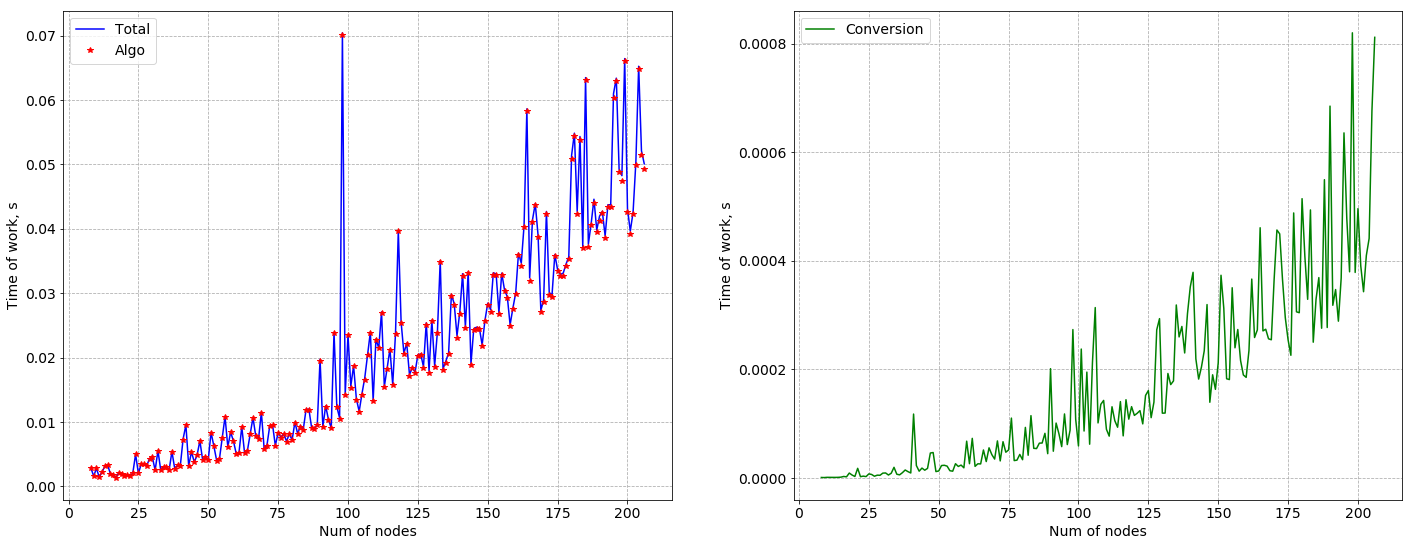

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

# timers = [datetime.datetime.fromtimestamp(t*1000) for t in timers]
plt.figure(figsize=(24,9))
plt.subplot(1, 2, 1)
plt.plot(variables, timers, 'b-', label="Total")
plt.plot(variables, algorithm_time, 'r*', label="Algo")
plt.ylabel("Time of work, s")
plt.xlabel("Num of nodes")
plt.legend()
plt.grid(linestyle="--")

plt.subplot(1, 2, 2)
plt.ylabel("Time of work, s")
plt.xlabel("Num of nodes")
plt.plot(variables, conversion_time, 'g-', label="Conversion")
plt.legend()
plt.grid(linestyle="--")


In [9]:
import pandas as pd

pd.DataFrame(data={"time (s)": algorithm_time, "number": variables}).describe()

,number,time (s)
count,199.000000,199.000000
mean,107.000000,0.020337
std,57.590508,0.016331
min,8.000000,0.001362
25%,57.500000,0.006299
50%,107.000000,0.017630
75%,156.500000,0.031083
max,206.000000,0.070160
